<a href="https://colab.research.google.com/github/harshbhabhera/Class-Work/blob/master/Lab!_WordCloud%2BSentencesSimilarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python program to generate WordCloud 

In [13]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

df = pd.read_json("http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Office_Products_5.json.gz", lines=True) 
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A32T2H8150OJLU,B00000JBLH,ARH,"[3, 4]","I bought my first HP12C in about 1984 or so, a...",5,"A solid performer, and long time friend",1094169600,"09 3, 2004"
1,A3MAFS04ZABRGO,B00000JBLH,"Let it Be ""Alan""","[7, 9]",WHY THIS BELATED REVIEW? I feel very obliged t...,5,"Price of GOLD is up, so don't bury the golden ...",1197676800,"12 15, 2007"
2,A1F1A0QQP2XVH5,B00000JBLH,Mark B,"[3, 3]",I have an HP 48GX that has been kicking for mo...,2,"Good functionality, but not durable like old HPs",1293840000,"01 1, 2011"
3,A49R5DBXXQDE5,B00000JBLH,R. D Johnson,"[7, 8]",I've started doing more finance stuff recently...,5,One of the last of an almost extinct species,1145404800,"04 19, 2006"
4,A2XRMQA6PJ5ZJ8,B00000JBLH,Roger J. Buffington,"[0, 0]",For simple calculations and discounted cash fl...,5,Still the best,1375574400,"08 4, 2013"


In [14]:
df = df.iloc[:1000]
df.shape

(1000, 9)

In [0]:
rev = df.reviewText

In [16]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

comment_words = ' '
stopwords = set(STOPWORDS) 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
# iterate through the file 
for val in rev: 
  # typecaste each val to string 
  val = str(val) 
  
  # split the value 
  sentences = val.split()
  for sentence in sentences :
    tokens = word_tokenize(sentence)
    
    # Converts each token into lowercase 
    for i in range(len(tokens)):
      tokens[i] = tokens[i].lower()
    
    for word in tokens:
      comment_words = comment_words + word + ' '

In [0]:
wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='black', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

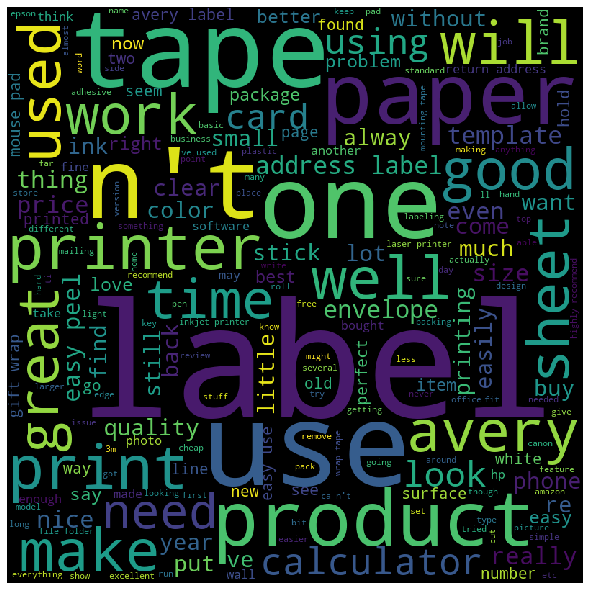

In [19]:
# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [0]:
df = df.iloc[:10]

In [21]:
df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A32T2H8150OJLU,B00000JBLH,ARH,"[3, 4]","I bought my first HP12C in about 1984 or so, a...",5,"A solid performer, and long time friend",1094169600,"09 3, 2004"
1,A3MAFS04ZABRGO,B00000JBLH,"Let it Be ""Alan""","[7, 9]",WHY THIS BELATED REVIEW? I feel very obliged t...,5,"Price of GOLD is up, so don't bury the golden ...",1197676800,"12 15, 2007"
2,A1F1A0QQP2XVH5,B00000JBLH,Mark B,"[3, 3]",I have an HP 48GX that has been kicking for mo...,2,"Good functionality, but not durable like old HPs",1293840000,"01 1, 2011"
3,A49R5DBXXQDE5,B00000JBLH,R. D Johnson,"[7, 8]",I've started doing more finance stuff recently...,5,One of the last of an almost extinct species,1145404800,"04 19, 2006"
4,A2XRMQA6PJ5ZJ8,B00000JBLH,Roger J. Buffington,"[0, 0]",For simple calculations and discounted cash fl...,5,Still the best,1375574400,"08 4, 2013"


In [0]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 


In [0]:
def sim(str1 , str2):
  # tokenization 
  X_list = word_tokenize(str1)  
  Y_list = word_tokenize(str2) 
    
  # sw contains the list of stopwords 
  sw = stopwords.words('english')  
  l1 =[];l2 =[] 
    
  # remove stop words from string 
  X_set = {w for w in X_list if not w in sw}  
  Y_set = {w for w in Y_list if not w in sw} 
    
  # form a set containing keywords of both strings  
  rvector = X_set.union(Y_set)  
  for w in rvector: 
      if w in X_set: l1.append(1) # create a vector 
      else: l1.append(0) 
      if w in Y_set: l2.append(1) 
      else: l2.append(0) 
  c = 0
    
  # cosine formula  
  for i in range(len(rvector)): 
          c+= l1[i]*l2[i] 
  cosine = c / float((sum(l1)*sum(l2))**0.5) 
  return(cosine) 

In [0]:

listt = []

In [0]:
for i in range(0,len(df.reviewText)):
  lis = []
  lis.append(df.reviewText[i])
  listt.append(lis)


In [33]:
listt

[["I bought my first HP12C in about 1984 or so, and it served me faithfully until 2002 when I lost it while travelling.  I searched for another one to replace it, but found one difficult to come by in my area.  So, I decided to buy up and purchased an HP 49G.  What a mistake!  I know that many people view the HP 49G (now 49G+) as the flagship of the HP line, but for me that was a disaster.The 49G may be powerful, but using it is extremely counterintuitive...and the manual was sketchy at best.  The 12C, on the other hand, does what I need in a way that makes good sense to me.If you are looking for a solid, reliable calculator, the HP12C may be for you.  It's programmable.  It does basic statistics well, and many business applications too.  The manual makes sense; you will be up and running in short order.I'm ready to set my 49G aside and move back to my old friend.  I didn't even have to replace the batteries in well over a decade of use!HP 12C, I'm coming home!"],
 ['WHY THIS BELATED R

In [0]:
scor = []

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
for i in range(0,(len(listt)-1)):
  for j in range(1,len(listt)):
    scor.append(sim(df.reviewText[i], df.reviewText[j]))


In [40]:
scor

[0.1486301082920587,
 0.18090680674665816,
 0.17548754082688625,
 0.21660005636099086,
 0.2159090909090909,
 0.22473328748774737,
 0.08891084489487741,
 0.15691147861521196,
 0.13762047064079508,
 1.0,
 0.10954451150103321,
 0.12594131321462998,
 0.10492627797422249,
 0.1266108329895315,
 0.14696938456699069,
 0.06460582824697986,
 0.12278812270298409,
 0.06666666666666667,
 0.10954451150103321,
 1.0,
 0.18107485769487527,
 0.13522468075656266,
 0.1507556722888818,
 0.19379255804998177,
 0.08846517369293828,
 0.16012815380508713,
 0.1460593486680443,
 0.12594131321462998,
 0.18107485769487527,
 1.0,
 0.18218593619664822,
 0.2209843106708938,
 0.2056613032745864,
 0.10170678563429347,
 0.15878314315561495,
 0.11019864906280122,
 0.10492627797422249,
 0.13522468075656266,
 0.18218593619664822,
 1.0,
 0.2548235957188128,
 0.2645751311064591,
 0.14953343588376805,
 0.13533299049019168,
 0.18516401995451032,
 0.1266108329895315,
 0.1507556722888818,
 0.2209843106708938,
 0.2548235957188128,

In [0]:
dff = pd.DataFrame(columns=['txt1', 'txt2', 'Scores'])

In [66]:
k = 0
for i in range(0, (len(listt)-1)):
  for j in range(1,len(listt)):
    
    print( (i , j , scor[k]))
    
    k = k + 1

(0, 1, 0.1486301082920587)
(0, 2, 0.18090680674665816)
(0, 3, 0.17548754082688625)
(0, 4, 0.21660005636099086)
(0, 5, 0.2159090909090909)
(0, 6, 0.22473328748774737)
(0, 7, 0.08891084489487741)
(0, 8, 0.15691147861521196)
(0, 9, 0.13762047064079508)
(1, 1, 1.0)
(1, 2, 0.10954451150103321)
(1, 3, 0.12594131321462998)
(1, 4, 0.10492627797422249)
(1, 5, 0.1266108329895315)
(1, 6, 0.14696938456699069)
(1, 7, 0.06460582824697986)
(1, 8, 0.12278812270298409)
(1, 9, 0.06666666666666667)
(2, 1, 0.10954451150103321)
(2, 2, 1.0)
(2, 3, 0.18107485769487527)
(2, 4, 0.13522468075656266)
(2, 5, 0.1507556722888818)
(2, 6, 0.19379255804998177)
(2, 7, 0.08846517369293828)
(2, 8, 0.16012815380508713)
(2, 9, 0.1460593486680443)
(3, 1, 0.12594131321462998)
(3, 2, 0.18107485769487527)
(3, 3, 1.0)
(3, 4, 0.18218593619664822)
(3, 5, 0.2209843106708938)
(3, 6, 0.2056613032745864)
(3, 7, 0.10170678563429347)
(3, 8, 0.15878314315561495)
(3, 9, 0.11019864906280122)
(4, 1, 0.10492627797422249)
(4, 2, 0.1352246807

,txt1,txt2,Scores
